# this is hyperparameters optimization process is based on bayesian method. The package named hyperopt.

In [1]:
import seaborn as sns
sns.set(style="whitegrid", palette="husl")


In [2]:

iris = sns.load_dataset("iris")
print(iris.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
iris_copy = iris.copy(deep=True)

In [4]:
import pandas as pd
iris = pd.melt(iris_copy, "species", var_name="measurement")
print(iris)


       species   measurement  value
0       setosa  sepal_length    5.1
1       setosa  sepal_length    4.9
2       setosa  sepal_length    4.7
3       setosa  sepal_length    4.6
4       setosa  sepal_length    5.0
..         ...           ...    ...
595  virginica   petal_width    2.3
596  virginica   petal_width    1.9
597  virginica   petal_width    2.0
598  virginica   petal_width    2.3
599  virginica   petal_width    1.8

[600 rows x 3 columns]


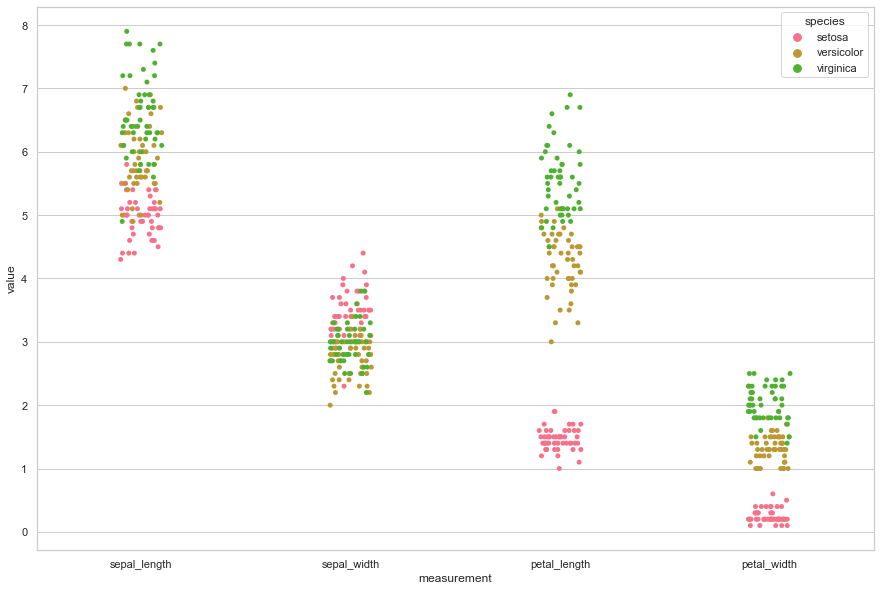

In [5]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(15,10))
sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)

In [6]:
X = iris_copy.iloc[:,0:4]
y = iris_copy.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
y.head()

In [8]:
!pip install hyperopt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
besbt = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
"""
STATUS_OK和Trials是新导入的。Trials对象允许我们在每个时间步存储信息。然后我们可以将它们打印出来，并在给定的时间步查看给定参数的函数评估值。

函数fmin首先接受一个函数来最小化，记为f，在这里用-acc来指定。该函数可以是任何有效的值返回函数，例如回归中的平均绝对误差。
下一个参数指定搜索空间，space4knn
algo 参数指定搜索算法，本例中tpe表示 tree of Parzen estimators
"""

100%|█████████████████████████████████████████████| 100/100 [00:02<00:00, 33.46trial/s, best loss: -0.9800000000000001]


In [ ]:
for trial in trials.trials[:2]:
    print (trial)

In [ ]:
f, ax = plt.subplots(1)#, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

100%|█████████████████████████████████████████████| 100/100 [00:08<00:00, 12.45trial/s, best loss: -0.9933333333333334]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



best:
{'C': 0.8491076796099407, 'gamma': 10.648882155392474, 'kernel': 0}


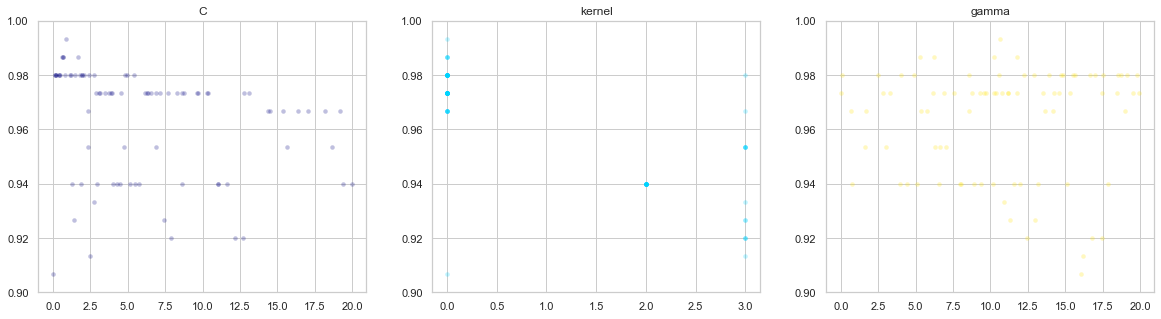

In [17]:
from sklearn.preprocessing import scale, normalize
import numpy as np
from sklearn.svm import SVC

def hyperopt_train_test(params):
    X_ = X[:]

    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            params.pop('normalize')#del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            params.pop('scale')#del params['scale']

    clf = SVC(**params)
    return cross_val_score(clf, X_, y).mean()

space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20)
    #'scale': hp.choice('scale', [0, 1])
    #'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

parameters = ['C', 'kernel', 'gamma']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    #xs, ys = zip(*sorted(zip(xs, ys)))
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.25, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)
    axes[i].set_ylim([0.9, 1.0])

100%|█████████████████████████████████████████████| 300/300 [00:07<00:00, 37.62trial/s, best loss: -0.9733333333333334]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



best:
{'criterion': 0, 'max_depth': 9, 'max_features': 2}


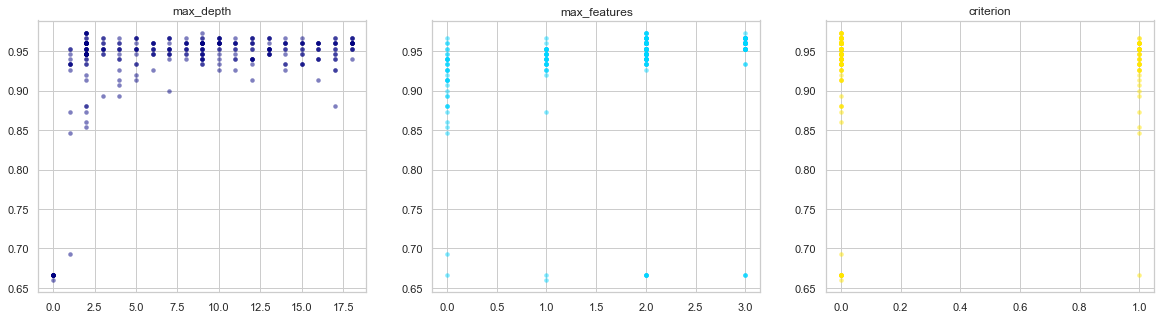

In [22]:
from sklearn.tree import DecisionTreeClassifier

def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
    #'scale': hp.choice('scale', [0, 1]),
    #'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:')
print(best)

parameters = ['max_depth', 'max_features', 'criterion']#, 'scale', 'normalize'] # decision tree
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))
    axes[i].set_title(val)
    #axes[i].set_ylim([0.9,1.0])


best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 3, 'n_estimators': 12}                                        
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'n_estimators': 2}                                         
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 16

0                                                                                                                      
{'criterion': 'gini', 'max_depth': 12, 'max_features': 4, 'n_estimators': 2}                                           
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'n_estimators': 17}                                          
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'n_estimators': 17}                                        
best:                                   

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 3, 'n_estimators': 19}                                        
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'n_estimators': 12}                                           
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 1, 'n_estimators': 8}                                        
best:                                                                                                                  
0                                       

best:                                                                                                                  
0                                                                                                                      
{'criterion': 'gini', 'max_depth': 1, 'max_features': 4, 'n_estimators': 2}                                            
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 3, 'n_estimators': 17}                                       
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 13

0                                                                                                                      
{'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'n_estimators': 18}                                          
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'n_estimators': 18}                                           
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 3, 'n_estimators': 1}                                        
best:                                   

{'criterion': 'gini', 'max_depth': 11, 'max_features': 2, 'n_estimators': 19}                                          
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 2, 'n_estimators': 17}                                       
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'gini', 'max_depth': 18, 'max_features': 4, 'n_estimators': 13}                                          
best:                                                                                                                  
0                                       

best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'n_estimators': 16}                                        
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 3, 'n_estimators': 1}                                        
best:                                                                                                                  
0                                                                                                                      
{'criterion': 'gini', 'max_depth': 11, '

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

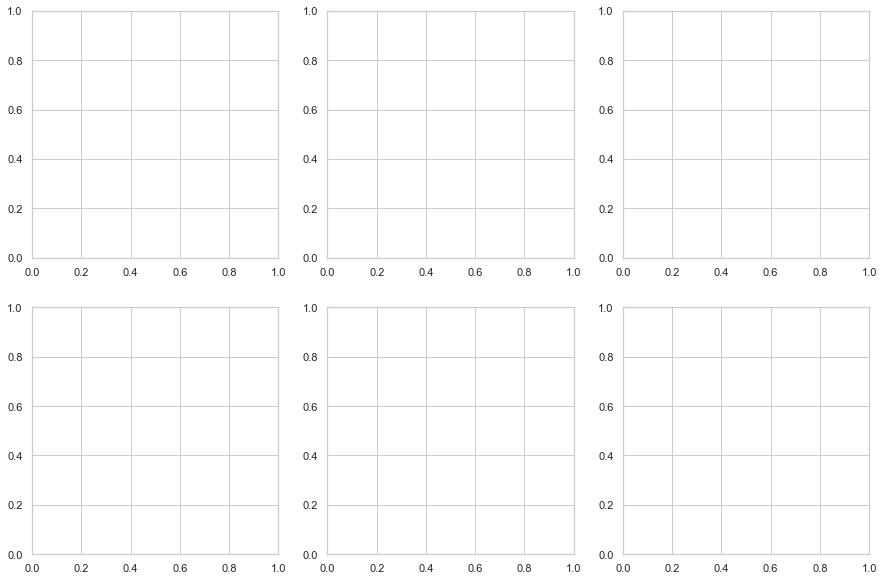

In [29]:
from sklearn.ensemble import RandomForestClassifier
def hyperopt_train_test(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
            del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
            del params['scale']
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
    #'scale': hp.choice('scale', [0, 1]),
    #'normalize': hp.choice('normalize', [0, 1])
}

best = 0
def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        est = acc
    print('best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:')
print(best)

parameters = ['n_estimators', 'max_depth', 'max_features', 'criterion']#, 'scale', 'normalize']
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    print(i, val)
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    axes[i/2,%2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))
    axes[i/2,%2].set_title(val)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

In [ ]:
def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, X, y).mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }
])

count = 0
best = 0
def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print 'new best:', acc, 'using', params['type']
        best = acc
    if count % 50 == 0:
        print 'iters:', count, ', acc:', acc, 'using', params
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=1500, trials=trials)
print 'best:'
print best